In [168]:
import czifile
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
import math

In [169]:
def get_channels(xml_str):
    import xml.etree.ElementTree as ET
    ImageDocument = ET.fromstring(xml_str)
    Metadata, = ImageDocument.getchildren()
    Version, Information, DisplaySetting, Scaling, Layers, Applicances, CustomAttributes, Experiment = Metadata.getchildren()
    User, Document, Image, Instrument, Application = Information.getchildren()
    OriginalScanData, PixelType, ComponentBitCount, SizeX, SizeY, SizeC, MicroscopeRef, ObjectiveSettings, Dimensions = Image.getchildren()
    Channels, Tracks, LambdaStacks, T_Element, S_Element = Dimensions.getchildren()
    return Channels

In [170]:
def get_emission_wavelength(channel):
    IlluminationType, ContrastMethod, PinholeSizeAiry, DetectionWavelength, ExcitationWavelength, EmissionWavelength, AcquisitionMode, LaserScanInfo, ChannelType, DetectorSettings, LightSourcesSettings, AiryscanSettings = channel.getchildren()
    emission_wavelength_nm = EmissionWavelength.text
    return emission_wavelength_nm

In [171]:
czi = czifile.CziFile('2PA_lambda_long.czi')

metadata = czi.metadata()
channels = get_channels(metadata)

In [172]:
channel_wavelengths = np.zeros(len(channels))
for i, channel in enumerate(channels):
    name = channel.attrib['Name']
    emission_wavelength_rounded_nm = round(float(get_emission_wavelength(channel)))
    channel_wavelengths[i] = emission_wavelength_rounded_nm

In [173]:
images_raw = czifile.imread('2PA_lambda_long.czi')
n_images = images_raw.shape[2] # 32
x_res = images_raw.shape[6] # 512
y_res = images_raw.shape[5] # 512
images_raw.shape

(1, 1, 32, 1, 1, 512, 512, 1)

In [174]:
images = np.squeeze(images_raw)
images.shape

(32, 512, 512)

In [215]:
def plot_image(i, filename=None, dpi=300):
    image = images[i]
    imgplot = plt.imshow(image, aspect='equal', cmap='gray', vmin=0, vmax=255)
    plt.title("{} nm".format(channel_wavelengths[i]))
    if filename is not None:
        plt.savefig(filename, dpi=dpi)
    plt.show()
    plt.clf()

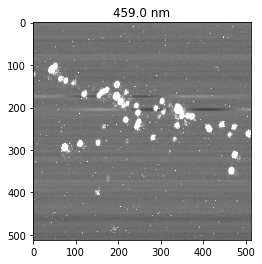

<Figure size 432x288 with 0 Axes>

In [216]:
plot_image(5, "459nm.png", dpi=250);

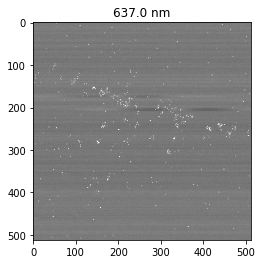

<Figure size 432x288 with 0 Axes>

In [217]:
plot_image(25, "637nm.png", dpi=250);

All together:

<Figure size 432x288 with 0 Axes>

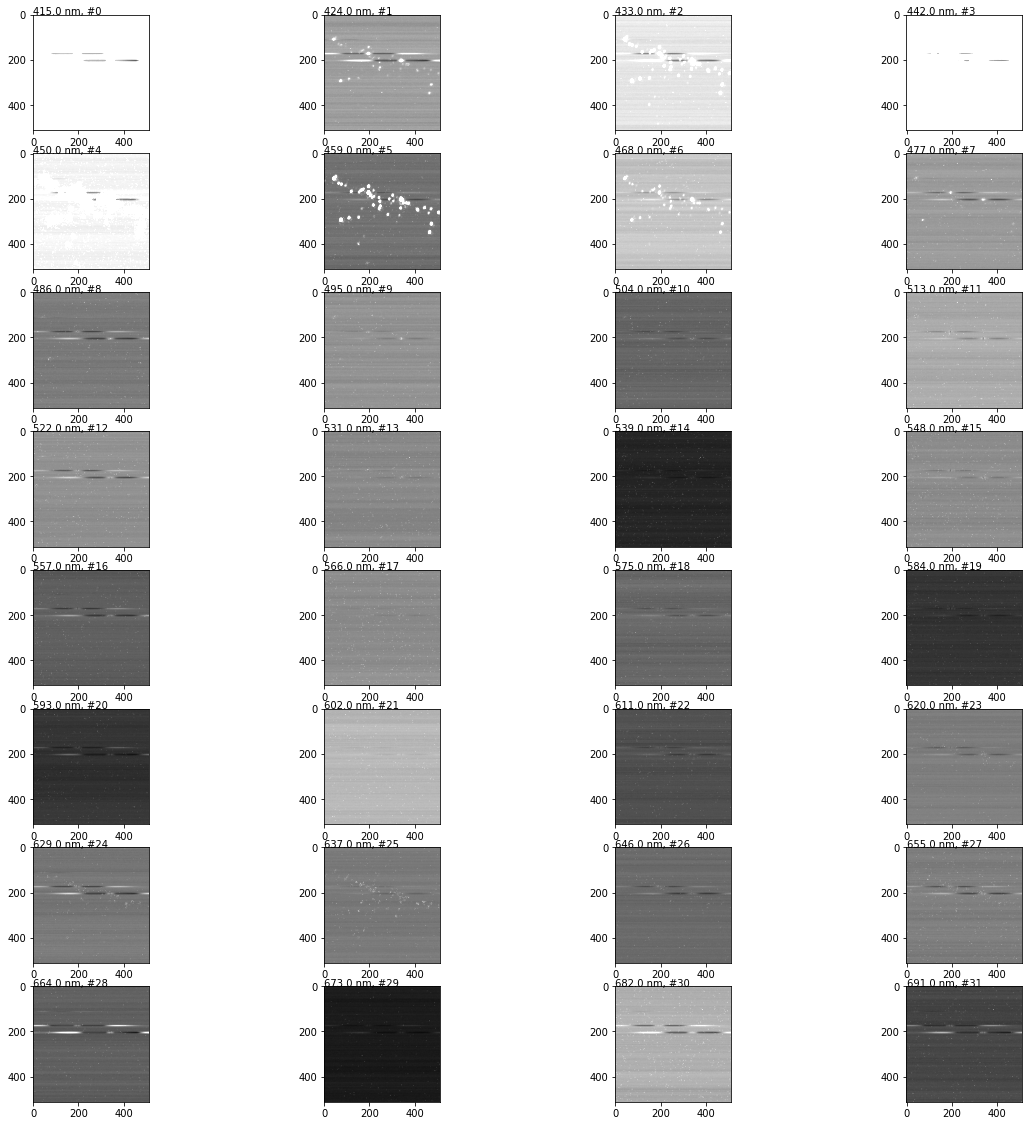

<Figure size 432x288 with 0 Axes>

In [177]:
plt.clf()
n_cols = 4
n_rows = 8
assert n_rows*n_cols >= len(images)
figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,20))
for i, image in enumerate(images):
    x, y = divmod(i, n_cols)
    # TODO: normalize each individually
    imgplot = axes[x,y].imshow(image, aspect='equal', cmap='gray', vmin=0, vmax=255)
    nm_label = "{} nm, #{}".format(channel_wavelengths[i], i)
    axes[x,y].text(0, 0, nm_label)
plt.show()
plt.clf();

In [218]:
def highlight_pixel(i, x, y, filename=None, dpi=300):
    image = images[i]
    imgplot = plt.imshow(image, aspect='equal', cmap='gray', vmin=0, vmax=255)
    plt.scatter(x,y,color='red', marker='.')
    plt.title("{} nm".format(channel_wavelengths[i]))
    if filename is not None:
        plt.savefig(filename, dpi=dpi)
    plt.show()
    plt.clf()

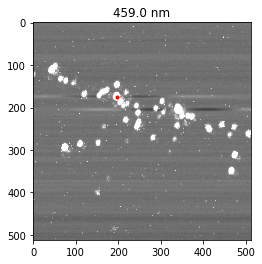

<Figure size 432x288 with 0 Axes>

In [219]:
highlight_pixel(5, 196, 175, "459_nm_196_175.png")

In [220]:
def plot_pixel_lambda(pixel_x, pixel_y, filename=None, dpi=300):
    # Need to use the y,x order instead of x,y order.
    pixel_intensities = images[:,pixel_y, pixel_x]
    plt.xlabel("nm")
    plt.ylabel("intensity (A.U.)")
    plt.scatter(channel_wavelengths, pixel_intensities)
    if filename is not None:
        plt.savefig(filename, dpi=dpi)
    plt.show()
    plt.clf()

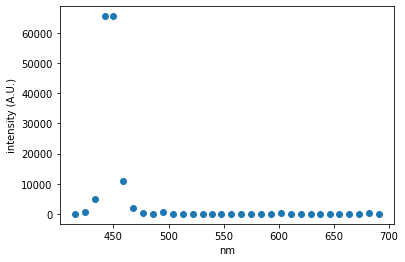

<Figure size 432x288 with 0 Axes>

In [181]:
plot_pixel_lambda(196, 175);

In [182]:
at_637nm = images[25]
at_637nm.max()

1319

In [183]:
np.where(at_637nm == at_637nm.max())

(array([239]), array([436]))

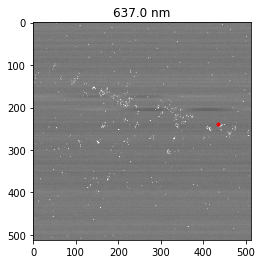

<Figure size 432x288 with 0 Axes>

In [222]:
highlight_pixel(25, 436, 239, "637nm_436_239.png")

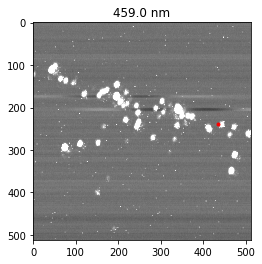

<Figure size 432x288 with 0 Axes>

In [223]:
highlight_pixel(5, 436, 239, "459nm_436_239.png")

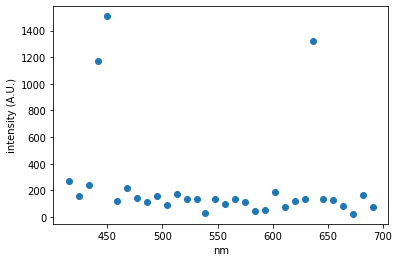

<Figure size 432x288 with 0 Axes>

In [221]:
plot_pixel_lambda(436, 239, "lambda_436_239.png");

In [202]:
# Look at 5 largest.
N = 5
tmp = at_637nm.flatten()
tmp.sort()
tmp[-N:]

array([ 967, 1012, 1148, 1254, 1319], dtype=uint16)

In [198]:
np.where(images[25] == 1254)

(array([370]), array([175]))

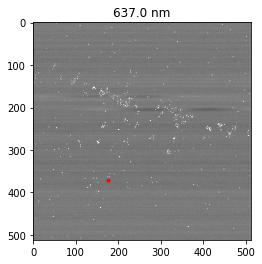

<Figure size 432x288 with 0 Axes>

In [199]:
highlight_pixel(25, 175, 370)

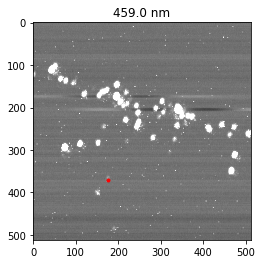

<Figure size 432x288 with 0 Axes>

In [200]:
highlight_pixel(5, 175, 370)

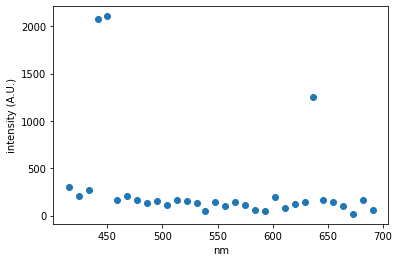

<Figure size 432x288 with 0 Axes>

In [201]:
plot_pixel_lambda(175, 370);

In [224]:
product_459nm_637nm = at_459nm * at_637nm

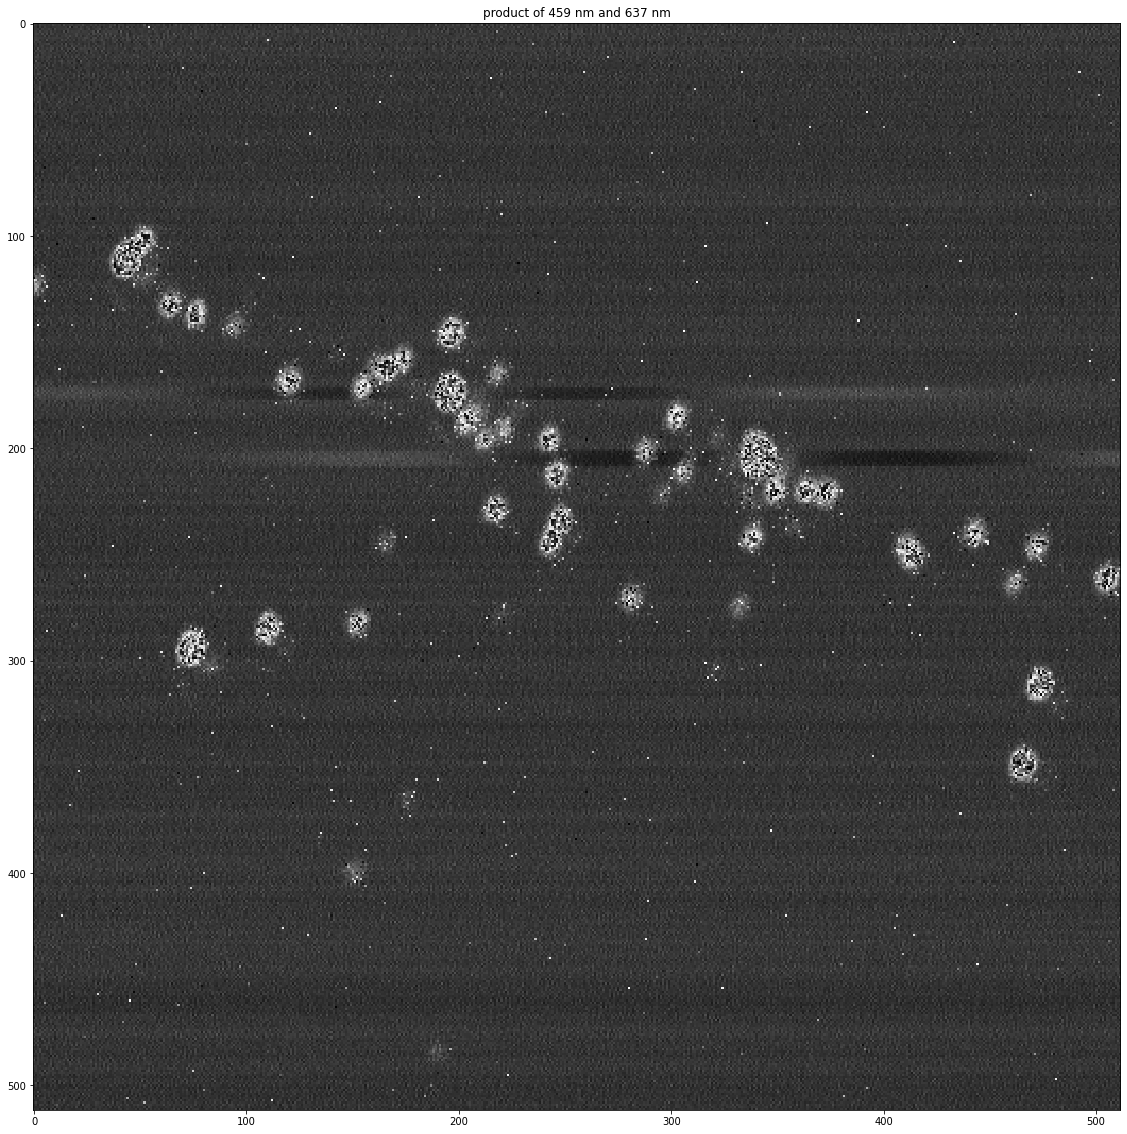

<Figure size 432x288 with 0 Axes>

In [233]:
figure_product_459nm_637nm = plt.figure(figsize=(20,20))
imgplot = plt.imshow(product_459nm_637nm, interpolation='none', cmap='gray', aspect='equal')
plt.title("product of 459 nm and 637 nm")
plt.show()
plt.clf()